In [1]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import math
import numbers
import time

2.0.0-alpha0


In [2]:
def make_circles(grid = 11, n_data = 10):    
    max_distance = int((grid-1)/2)
    radii = np.random.randint(max_distance/4.,max_distance,size = (n_data, 2))
    radii = radii.flatten()
    distance = np.random.randint(max_distance, size = n_data)
    distances = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in distance])
    radii1 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[::2]])
    radii2 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[1::2]])
    circle = np.zeros((n_data, grid, grid))
    circlex = np.zeros((grid, grid))
    circley = np.zeros((grid, grid))
    circlex[:][:][:] = np.arange(grid)
    circley[:][:][:] = np.transpose(circlex)
    x1 = circley - max_distance + distances/2
    x2 = circley - max_distance - distances/2
    y = circlex - max_distance
    position1 = np.sqrt(x1**2+y**2)
    position2 = np.sqrt(x2**2+y**2)
    fill1 = position1 <= radii1
    fill2 = position2 <= radii2
    p1 = np.exp((-1./2.)*(3.*position1/radii1)**2.)
    p2 = np.exp((-1./2.)*(3.*position2/radii2)**2.)
    p1 = np.where(fill1, p1, 0.0)
    p2 = np.where(fill2, p2, 0.0)
    circles = p1 + p2
    circles = circles.reshape(n_data, grid**2)
    radii = radii.reshape(n_data, 2)
    distances = distances.reshape(n_data*grid**2,1)[::grid**2]
    return circles, radii, distances
    

Make data:

In [3]:
grid = 100
n_data = 500
toc = time.clock()
circleData, radiiLabels, distanceLabels = make_circles(grid, n_data)
tic = time.clock()
print(tic-toc)

0.639058


Print a plot of data to see what it looks like!

radius = 
[32 48]
distance between centers = 
[25.]


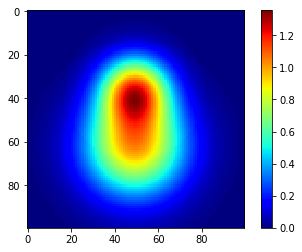

In [4]:
display = circleData[60].reshape(grid,grid)
plt.grid(False)
plt.imshow(display, cmap = 'jet')
print("radius = ")
print(radiiLabels[60])
print("distance between centers = ")
print(distanceLabels[60])
plt.colorbar()

Preprocessing -> spit data into training and testing; take 80% for training and 20% for testing.

If using CNN, uncomment ".reshape(n_data, grid, grid, 1)".

In [5]:
distanceData = circleData#.reshape(n_data, grid, grid, 1)

split = int(0.8*len(circleData))
train_data = distanceData[:split]
train_labels = distanceLabels[:split]
print (train_data.shape)
test_data = distanceData[split:]
print(test_data.shape)
test_labels = distanceLabels[split:]

(400, 10000)
(100, 10000)


Build DNN:

In [6]:
def build_model():
  model = keras.Sequential([
    #layers.Conv2D(32, (3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    #layers.AveragePooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'),
    #layers.Flatten(),
    layers.Dense(64, activation=tf.nn.relu), 
    layers.Dense(64, activation=tf.nn.relu), 
    layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error', 'mean_absolute_error'])
  return model

Initialize model:

In [7]:
model_circ = build_model()

Test model's prediction $before$ training:

In [8]:
example_batch = train_data[:10]
example_labels = train_labels[:10]
example_result = model_circ.predict(example_batch)
results = model_circ.evaluate(example_batch, example_labels)
example_result

10/10 [==============================] - 0s 4ms/sample - loss: 834.2928 - mean_squared_error: 834.2928 - mean_absolute_error: 24.7092


array([[0.4297049 ],
       [0.5963912 ],
       [0.58607143],
       [0.3387242 ],
       [0.47343484],
       [0.43242818],
       [0.60082155],
       [0.5072698 ],
       [0.5917652 ],
       [0.35124785]], dtype=float32)

Now train! (warning: if building CNN, computer tends to get loud)

In [9]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('')
    print('.', end='')
    
EPOCHS = 100

history = model_circ.fit(
  train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[PrintDot()])

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 0s 509us/sample - loss: 358.0209 - mean_squared_error: 358.0209 - mean_absolute_error: 15.3531 - val_loss: 178.8818 - val_mean_squared_error: 178.8819 - val_mean_absolute_error: 10.3936
Epoch 2/100
320/320 [==============================] - 0s 177us/sample - loss: 116.0506 - mean_squared_error: 116.0506 - mean_absolute_error: 8.7138 - val_loss: 70.9281 - val_mean_squared_error: 70.9281 - val_mean_absolute_error: 6.8580
Epoch 3/100
320/320 [==============================] - 0s 180us/sample - loss: 56.7583 - mean_squared_error: 56.7583 - mean_absolute_error: 5.8168 - val_loss: 57.1270 - val_mean_squared_error: 57.1270 - val_mean_absolute_error: 6.1583
Epoch 4/100
320/320 [==============================] - 0s 187us/sample - loss: 38.1910 - mean_squared_error: 38.1910 - mean_absolute_error: 4.9694 - val_loss: 31.7791 - val_mean_squared_error: 31.7791 - val_mean_absolute_error: 4.7897
Epoch 5

320/320 [==============================] - 0s 143us/sample - loss: 0.4041 - mean_squared_error: 0.4041 - mean_absolute_error: 0.4774 - val_loss: 0.4302 - val_mean_squared_error: 0.4302 - val_mean_absolute_error: 0.4880
Epoch 71/100
320/320 [==============================] - 0s 132us/sample - loss: 0.3562 - mean_squared_error: 0.3562 - mean_absolute_error: 0.4140 - val_loss: 0.4068 - val_mean_squared_error: 0.4068 - val_mean_absolute_error: 0.4737
Epoch 72/100
320/320 [==============================] - 0s 127us/sample - loss: 0.3711 - mean_squared_error: 0.3711 - mean_absolute_error: 0.4395 - val_loss: 0.6407 - val_mean_squared_error: 0.6407 - val_mean_absolute_error: 0.6060
Epoch 73/100
320/320 [==============================] - 0s 132us/sample - loss: 0.5278 - mean_squared_error: 0.5278 - mean_absolute_error: 0.5711 - val_loss: 0.4667 - val_mean_squared_error: 0.4667 - val_mean_absolute_error: 0.5089
Epoch 74/100
320/320 [==============================] - 0s 152us/sample - loss: 0.554

Now make a plot that shows the pregression of accuracy through each training epoch.

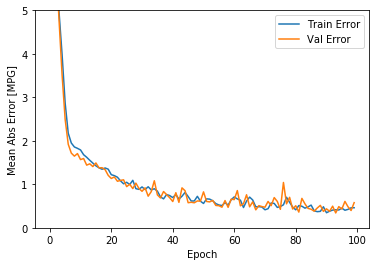

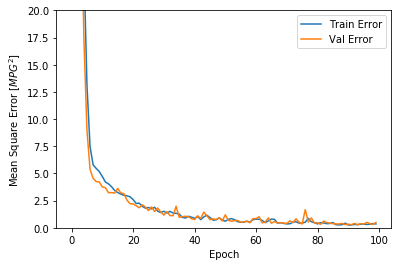

In [10]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

Now have the model train with "early stopping". the tensorflow "early stopping" function has the training stop according to a monitor. In our case, we are stopping it when the monitor sees an insufficient change in variable loss within the last ten epochs.


......................................................................................

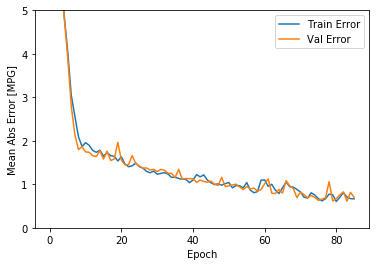

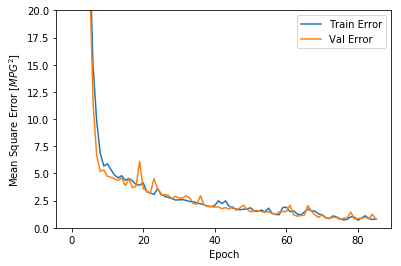

In [11]:
model_circ = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history_earlyStop = model_circ.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history_earlyStop)

In [12]:
results = model_circ.evaluate(test_data, test_labels)

100/100 [==============================] - 0s 83us/sample - loss: 0.7152 - mean_squared_error: 0.7152 - mean_absolute_error: 0.6677


Evaluate the performance of our DNN! Plot predictions vs. true values (the line is predictions vs. predicitons).

Multilayer perceptron: initial MSE ~ 656.7611; final MSE ~ 0.8408.

CNN: initial MSE ~ 1170.2961; final MSE ~ 1.6238.

CNN w/ MaxPooling layer: initial MSE ~ 1167.0415; final ~ MSE 0.4101.

CNN w/ AveragePooling layer: initial MSE ~ 804.62; final ~ 0.78.

100/100 [==============================] - 0s 106us/sample - loss: 0.7152 - mean_squared_error: 0.7152 - mean_absolute_error: 0.6677


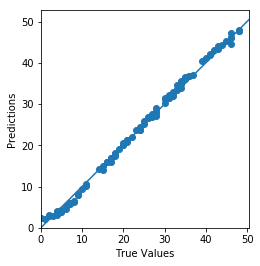

In [13]:
test_predictions = model_circ.predict(test_data)
results = model_circ.evaluate(test_data, test_labels)
plt.scatter(test_labels.flatten(), test_predictions.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


Now let's use the same network to predict radii!

To use CNN, uncomment "circleData = circleData.reshape(n_data, grid, grid, 1)"

In [21]:
#circleData = circleData.reshape(n_data, grid, grid, 1)
split = int(0.8*len(circleData))
train_data_rad = circleData[:split]
train_labels_rad = radiiLabels[:split]
test_data_rad = circleData[split:]
test_labels_rad = radiiLabels[split:]

To implement basic CNN, uncomment "layers.Conv2D(32, (3, 3), activation='relu')," and "layers.Flatten()"

To implement MaxPooling CNN, uncomment "layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),"


In [22]:
def build_model_rad():
  model = keras.Sequential([
    #layers.Conv2D(32, (3, 3), activation='relu'),
    #layers.AveragePooling2D((2, 2)),
    #layers.MaxPooling2D((2, 2)),
    #layers.Conv2D(64, (3, 3), activation='relu'), 
    #layers.Flatten(),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(2)
  ])

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error', 'accuracy'])
  return model

In [23]:
model_rad = build_model_rad()
example_batch = train_data_rad[:10]
example_labels = train_labels_rad[:10]
example_result = model_rad.predict(example_batch)
results = model_rad.evaluate(example_batch, example_labels)
example_result

10/10 [==============================] - 0s 8ms/sample - loss: 1400.4843 - mean_absolute_error: 36.7719 - mean_squared_error: 1400.4843 - accuracy: 0.8000


array([[-0.10750355, -0.06206243],
       [-0.09680151, -0.05367741],
       [-0.12551165, -0.06551542],
       [-0.07390626, -0.03619551],
       [-0.10304245, -0.05248193],
       [-0.07230661, -0.01358388],
       [-0.11228917, -0.03980953],
       [-0.08627913, -0.03157031],
       [-0.11136719, -0.0579782 ],
       [-0.08675078, -0.04871074]], dtype=float32)


....................................................................................................

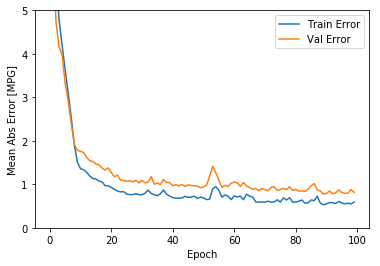

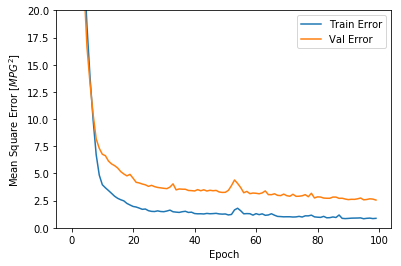

In [24]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('')
    print('.', end='')
    
EPOCHS = 100

history = model_rad.fit(
  train_data_rad, train_labels_rad,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[PrintDot()])

plot_history(history)

For epochs = 1000, the above plot is a good example of how the error on the validation data can actually increase after a certain epoch-value is reached.


....................................................................................................

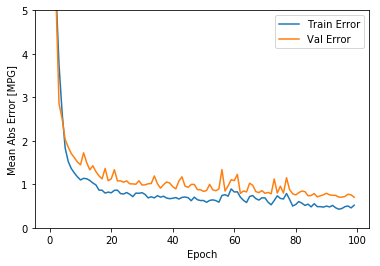

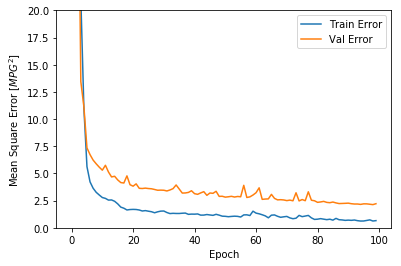

In [25]:
model = build_model_rad()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_data_rad, train_labels_rad, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [26]:
results = model.evaluate(test_data_rad, test_labels_rad)
print(results)


100/100 [==============================] - 0s 1ms/sample - loss: 1.0047 - mean_absolute_error: 0.5257 - mean_squared_error: 1.0047 - accuracy: 0.9700
[1.0046992874145508, 0.5256689, 1.0046993, 0.97]


Multilayer perceptron: final accuracy ~ 95%; initial MSE ~ 1019.7198 ; final MSE ~ 7.7464.

CNN: final accuracy ~ 96%; intitial MSE ~ 797.3132; final MSE ~ 4.2162.

CNN w/ MaxPooling layer: final accuracy ~ 97%; initial MSE ~ 800.8616; final MSE ~ 3.8766.

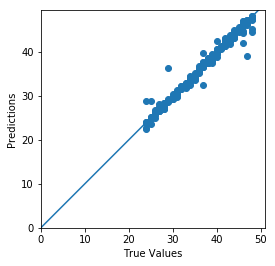

In [27]:
test_predictions_rad = model_rad.predict(test_data_rad).flatten()
plt.scatter(test_labels_rad, test_predictions_rad)

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])